In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from crossValidation import *
from overlap_genes import * 

C:\Users\alexi\Desktop\Memory_genes\src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

In [6]:
norm = pd.read_csv ('../data/merged_data/CD8.csv')
norm = norm.set_index('Unnamed: 0').T
y = np.squeeze(np.array(pd.read_csv ('../data/merged_data/y_CD8.csv')))
print(norm.shape)

#Save gene interest
pd.DataFrame(norm.T.index).to_csv('../data/processed_data/CD8genes_interest.csv', index = False)

(78, 14980)


# CD8

In [ ]:
print('CD8')
N = np.arange(100,4000,25)
best_subset, best_score = MIM(y, norm, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [ ]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.6923076923076923 0.8168168168168168
0.7348066298342542 0.7357357357357357


1309 0.736318407960199


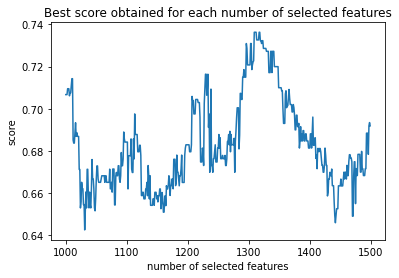

In [30]:
N = np.arange(1000,1500,1)
best_subset, best_score = ANOVA(y, norm, FamiliesClusters, compute_recovery,True, N, plot=True)
print(len(best_subset), best_score)

In [31]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.736318407960199 0.7837837837837838
0.7840909090909091 0.6966966966966966


In [7]:
get_best_genes_names(best_subset, '../data/processed_data/CD8genes_interest.csv', '../data/optimized_subsets/CD8genes_best.csv')

# L1210

In [4]:
norm = pd.read_csv ('../data/merged_data/L1210.csv')
norm = norm.set_index('Unnamed: 0').T
y = np.squeeze(np.array(pd.read_csv ('../data/merged_data/y_L1210.csv')))
print(norm.shape)

#Save gene interest
pd.DataFrame(norm.T.index).to_csv('../data/processed_data/L1210genes_interest.csv', index = False)

norm = np.array(norm)

(66, 15157)


In [ ]:
N = np.arange(100,4000,25)
best_subset, best_score = MIM(y, norm, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [ ]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.6923076923076923 0.8168168168168168
0.7348066298342542 0.7357357357357357


In [ ]:
MIM_sub = best_subset

1309 0.736318407960199


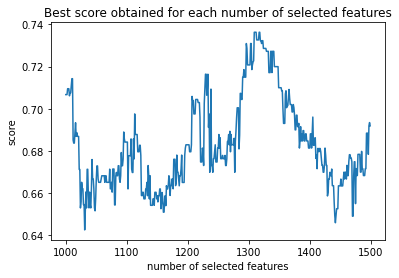

In [30]:
N = np.arange(1000,1500,1)
best_subset, best_score = ANOVA(y, norm, FamiliesClusters, compute_recovery,True, N, plot=True)
print(len(best_subset), best_score)

In [31]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = norm[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.736318407960199 0.7837837837837838
0.7840909090909091 0.6966966966966966


In [7]:
get_best_genes_names(best_subset, '../data/processed_data/CD8genes_interest.csv', '../data/optimized_subsets/CD8genes_best.csv')